In [1]:
pip install ucimlrepo

In [2]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset
#iris = fetch_ucirepo(id=53)
iris = fetch_ucirepo(name='Iris')

# data (as pandas dataframes)
df_X = iris.data.features
df_y = iris.data.targets

print(df_X.head())

print(df_y.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


In [4]:
X = np.array(df_X)
Y = np.array(df_y['class'])
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)
Y_bin= to_categorical(Y)

print(Y)

etiquetas = encoder.inverse_transform([0,1,2])
print("\n\n Etiquetas = ",etiquetas)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 Etiquetas =  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
Y_bin[[2,3,60,70,120],:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X, Y_bin, test_size=0.20) #, random_state=42)

In [7]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [8]:

# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Input(shape=(4,)))
model.add(Dense(2, activation='tanh'))      # model.add(Dense(2, input_shape=[4], activation='tanh’))
model.add(Dense(3, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Configuración para entrenamiento
#model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])



In [10]:
# model.fit(X_train,Y_trainB, epochs=500)

es = EarlyStopping(monitor='val_accuracy', patience=30, min_delta=1e-08, restore_best_weights=True)

H = model.fit(x = X_train, y = Y_train, epochs=4000, batch_size = 20,
              validation_data = (X_test, Y_test),  callbacks=[es])



Epoch 1/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.1757 - loss: 1.2644 - val_accuracy: 0.5000 - val_loss: 1.0278
Epoch 2/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4794 - loss: 0.9434 - val_accuracy: 0.5000 - val_loss: 0.8529
Epoch 3/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5569 - loss: 0.7815 - val_accuracy: 0.6000 - val_loss: 0.7660
Epoch 4/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5664 - loss: 0.7184 - val_accuracy: 0.7000 - val_loss: 0.7089
Epoch 5/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6426 - loss: 0.6524 - val_accuracy: 0.8333 - val_loss: 0.6675
Epoch 6/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7983 - loss: 0.6242 - val_accuracy: 0.8333 - val_loss: 0.6362
Epoch 7/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8615 - loss: 0.5992 - val_accuracy: 0.8333 - val_loss: 0.6117
Epoch 8/4000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8414 - loss: 0.5707 - val_accuracy: 0.8333 - 

In [11]:
print("épocas = %d" % len(H.history["val_accuracy"]))
print("Epocas = %d" % es.stopped_epoch)

épocas = 63
Epocas = 62


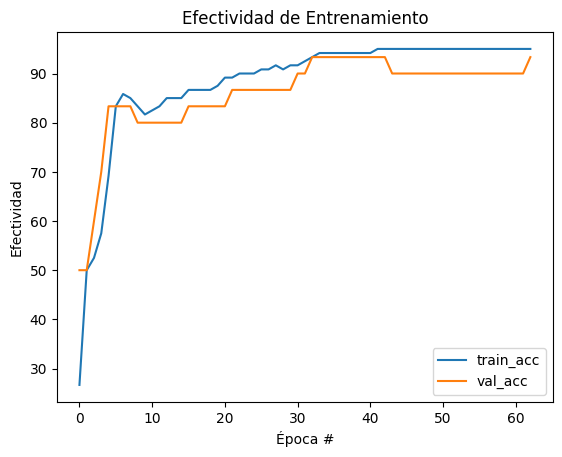

In [12]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

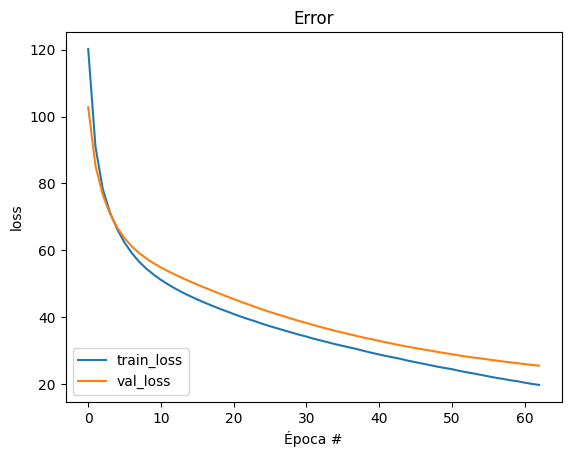

In [13]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["loss"])
val_accuracy = np.array(H.history["val_loss"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_loss")
plt.plot(N, 100*val_accuracy, label="val_loss")
plt.title("Error")
plt.xlabel("Época #")
plt.ylabel("loss")
plt.legend(loc="lower left")

In [14]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)

# Convertir la salida del modelo en un número entero
Y_pred2 = np.argmax(Y_pred,axis=1)
Y_true =  np.argmax(Y_train,axis=1)
print("%% aciertos : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))
print(Y_pred[:5,:])
print(Y_pred2[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
% aciertos : 0.942
[[0.9231619  0.06494077 0.01189738]
 [0.9271448  0.061188   0.0116671 ]
 [0.0112781  0.22089149 0.7678303 ]
 [0.9298098  0.05895053 0.01123959]
 [0.9131503  0.07267907 0.01417061]]
[0 0 2 0 0]


In [15]:
# Evaluación del modelo
score = model.evaluate(X_train, Y_train)

print('Error :', score[0])
print('Accuracy:', score[1])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9360 - loss: 0.3293 
Error : 0.3263794481754303
Accuracy: 0.9416666626930237


In [16]:
report = metrics.classification_report(Y_true, Y_pred2, target_names=etiquetas)
print("Training metrics:\n%s" % report)

MM = metrics.confusion_matrix(Y_true, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Training metrics:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.84      0.90        38
 Iris-virginica       0.87      0.97      0.92        40

       accuracy                           0.94       120
      macro avg       0.95      0.94      0.94       120
   weighted avg       0.95      0.94      0.94       120

Confusion matrix:
[[42  0  0]
 [ 0 32  6]
 [ 0  1 39]]


In [17]:
# predecir la salida del modelo
Y_pred = model.predict(X_test)
Y_pred2 = np.argmax(Y_pred,axis=1)
Y_true =  np.argmax(Y_test,axis=1)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
% aciertos X_train : 0.933


In [18]:
report = metrics.classification_report(Y_true, Y_pred2, target_names=etiquetas)

print("Métricas de la clasificación:\n%s" % report)

Métricas de la clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [19]:
MM = metrics.confusion_matrix(Y_true, Y_pred2)

print("Confusion matrix:\n%s" % MM)
# Convertimos la matriz de confusión en un DataFrame con etiquetas
df_cm = pd.DataFrame(MM, index=etiquetas, columns=etiquetas)

# Mostramos el DataFrame resultante
print("\n\n",df_cm)

Confusion matrix:
[[ 8  0  0]
 [ 0 10  2]
 [ 0  0 10]]


                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                8                0               0
Iris-versicolor            0               10               2
Iris-virginica             0                0              10


In [20]:
capaOculta = model.layers[0]
W1, b1 = capaOculta.get_weights()

capaSalida = model.layers[1]
W2,b2 = capaSalida.get_weights()

print("W1")
print(W1)

print("b1")
print(b1)

print("W2")
print(W2)

print("b2")
print(b2)

W1
[[-0.43327639  0.10921374]
 [ 0.44036207  0.47945058]
 [ 1.0126766  -0.8650934 ]
 [ 0.97831273 -0.8632761 ]]
b1
[-0.4031569  -0.41416395]
W2
[[-1.454115   -1.2304192   0.37775475]
 [ 1.6016494  -1.1220998  -1.0031319 ]]
b2
[-0.01835397  0.12027608 -0.10192211]


In [21]:
#model.save("IRIS_Sigmoid.h5")